### Description
* datetime 
    - 연도-월-일-시간
* season 
    - 1 = 봄, 
    - 2 = 여름
    - 3 = 가을
    - 4 = 겨울 
* holiday 
    - 0 = 공휴일
    - 1= 비공휴일
* workingday
    - 0 = 평일(주말 또는 휴일 아님)
    - 1 = 평일 아님
* weather 
    - 1: 맑음 + 구름 거의 없음 + 구름 약간 
    - 2: 옅은 안개 + 구름 + 구름 약간과 옅은 안개 
    - 3: 가벼운 눈 또는 비 + 가벼운 비 후 개임 + 흐트러진 구름(scattered clouds) 
    - 4: 호우 + 빙판 + 뇌우 + 짙은 안개와 눈 + 짙은 안개
    - 1에서 4로 갈 수록 날씨가 좋지 않다
* temp 
    - 섭씨온도
* atemp
    - 체감온도
* humidity 
    - 습도
* windspeed 
    - 풍속
* casual 
    - 등록되지 않은 비회원의 대여 수
* registered 
    - 등록된 회원의 대여 수
* count 
    - 총 대여 수


### Evaluation
Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)


In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import platform

path = "c:/Windows/Fonts/HYGPRM.TTF"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [48]:
train = pd.read_csv("../data/train.csv", parse_dates=["datetime"]) # datetime을 파싱한다
train.shape

(10886, 12)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [50]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

비어있는 데이터 없이 모두 10886개의 데이터로 채워져있다

In [51]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


windspeed (풍속)이 0인 것이 많아 이 부분을 feature engineering 해야한다

In [52]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [31]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [53]:
# 연,월,일,시,분,초 으로 나누어 시각화하기 위해 컬럼을 추가한다

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["min"] = train["datetime"].dt.minute
train["sec"] = train["datetime"].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5,0,'hour'), Text(0.5,1,'시간별 대여량')]

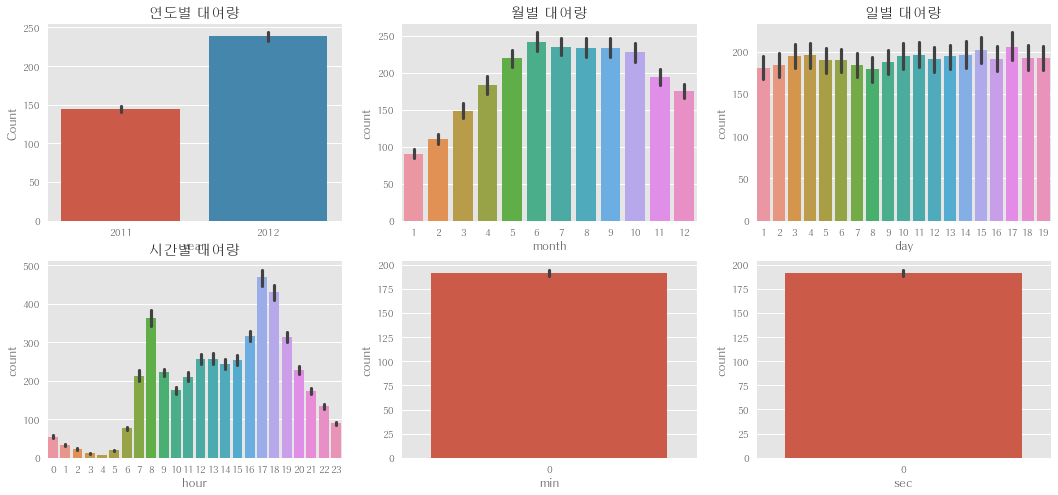

In [55]:
# 나누었던 datetime을 barplot으로 시각화 한다

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="min", y="count", ax=ax5)
sns.barplot(data=train, x="sec", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

- 연도별 대여량 : 2011년 보다 2012년이 더 많아 증가하였다.
- 월별 대여량 : 6월에 가장 많고, 7~10월도 많다. 1월이 가장 적다.
- 일별 대여량 : 1~19일 까지만 데이터가 존재하기 때문에 이 데이터는 피처로 사용할 수 없다.
- 시간별 대여량 : 출퇴근 시간에 가장 많다. 따라서, 주말의 데이터도 나누어 보아야할 것 같다.
- 분,초 는 0이기 때문에 의미가 없다

[Text(0,0.5,'Count'), Text(0.5,0,'Working Day'), Text(0.5,1,'근무일 여부에 따른 대여량')]

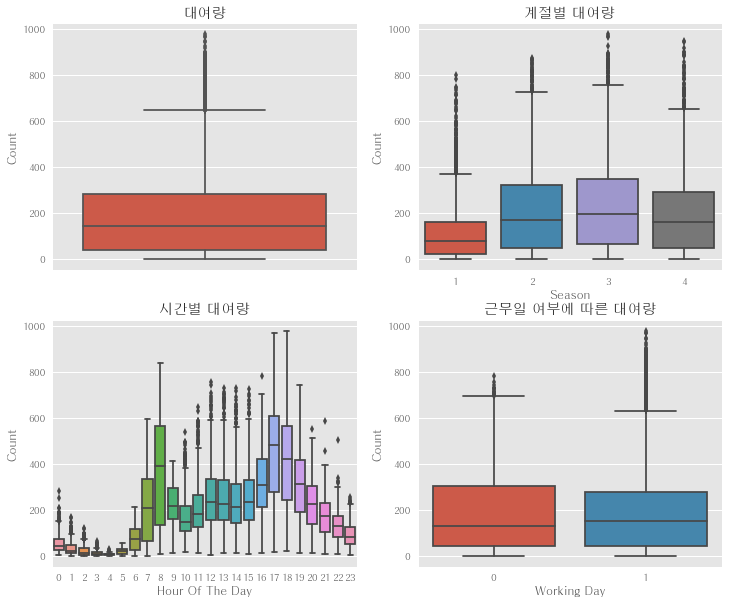

In [63]:
# boxplot 으로 시각화 한다
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12,10)

sns.boxplot(data=train,y="count",ax=ax1)
sns.boxplot(data=train,y="count",x="season",ax=ax2)
sns.boxplot(data=train,y="count",x="hour",ax=ax3)
sns.boxplot(data=train,y="count",x="workingday",ax=ax4)

ax1.set(ylabel='Count',title="대여량")
ax2.set(xlabel='Season', ylabel='Count',title="계절별 대여량")
ax3.set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
ax4.set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")

- 대여량은 특정 구간에 몰려있다.
- 계절별 대여량은 봄이 가장 적고, 여름과 가을이 가장 많다.
- 위의 barplot 결과와 비슷하게 출퇴근 시간에 가장 많다.
- 근무일 여부와는 큰 차이가 보여지지 않는다.

In [66]:
train["dayofweek"] = train["datetime"].dt.dayofweek # 0:월 1:화 2:수 3:목 4:금 5:토 6:일
train["dayofweek"].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

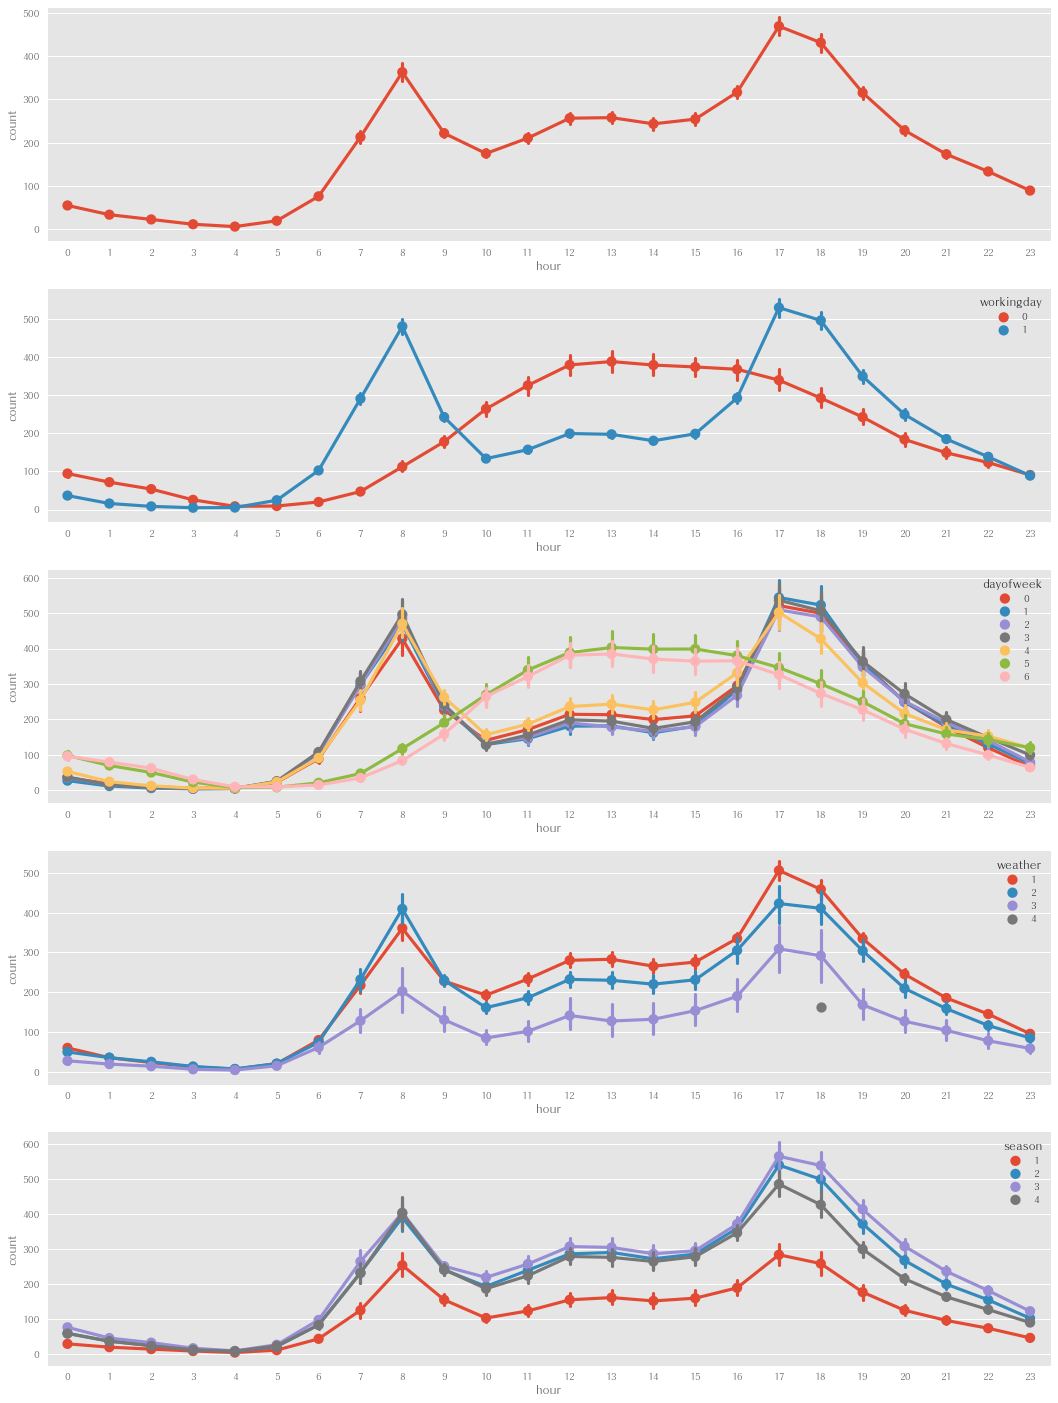

In [67]:
# pointplot으로 근무일 여부, 요일, 날씨, 계절 에따른 시간대별 대여량을 시각화 한다.

fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

- 근무일일 때에는 출퇴근 시간, 휴일일 때에는 오후시간에 대여량이 많다.
- 평일(0~4)에는 출퇴근 시간, 토요일(5), 일요일(6)에는 오후 시간에 대여량이 많다. (그래프가 workingday와 매우 흡사하다)
- 날씨가 좋을 때 대여량이 많다.
- 봄에 가장 적고, 가을,여름,겨울 순으로 대여량이 많다.

In [68]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr() # 연관관계를 알아낸다

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

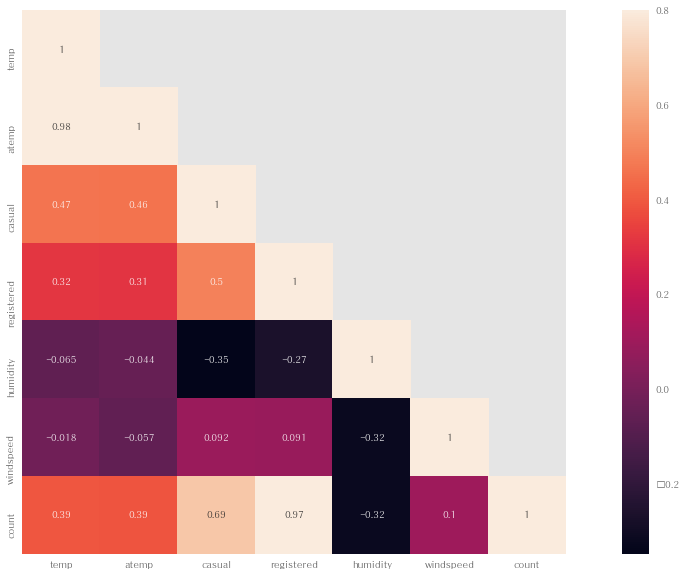

In [69]:
# heatmap 으로 연관관계를 시각화한다
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

- 온도, 습도, 풍속은 거의 연관관계가 없다. 
- 대여량과 가장 연관이 높은 건 registered 이지만, test 데이터에는 이 값이 없다.
- temp와 atemp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.

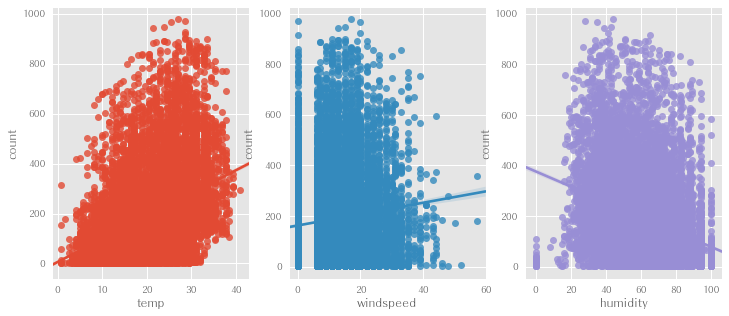

In [70]:
# regplot으로 산점도를 그려본다
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

- 풍속의 경우 0에 데이터가 몰려있음 